# Assignment 1

First we need to import a few modules, execute the cell below:

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [3]:
def f(x):
    return numpy.cos(x)
    

You can use the following cell to check that your code works for scalar arguments:

In [4]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [5]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [6]:
def df_analytic(x):
    return numpy.sin(x)*-1

In [7]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [8]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [9]:
def backward_difference(f, x, dx):
    return ((-1*f(x-dx)+f(x))/dx)

In [10]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


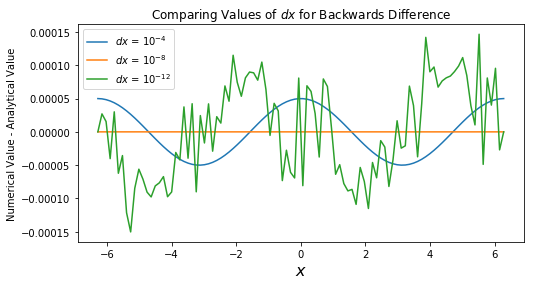

In [20]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-8)
df_dx_3 = backward_difference(f, xs, dx = 1e-12)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical, label = '$dx$' " = " '$10^{-4}$')
plt.plot(xs, df_dx_2 - df_dx_analytical, label = '$dx$' " = "'$10^{-8}$')
plt.plot(xs, df_dx_3 - df_dx_analytical, label ='$dx$' " = "'$10^{-12}$') 
plt.xlabel('$x$', fontsize = 16)
plt.ylabel("Numerical Value - Analytical Value")
plt.title("Comparing Values of " '$dx$' " for Backwards Difference")
plt.legend(loc = "best")

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When $\Delta x$ is too small (around $10^{-12}$), we are close to the numerical precision of the computer. comparitively, the values of $x$ are much greater than $\Delta x$, meaning rounding off errors occur as $x$ and $\Delta x$ are both floating point numbers.

When $\Delta x$ is too large, the taylor series approximation:

$f' (x)$ $\approx$ $\frac{f(x_0 + \Delta x)  -  f(x_0)}{\Delta x}$

no longer holds as it no longer approximates a straight line between 2 points.